<a href="https://colab.research.google.com/github/Achilles-Analytics/SP500/blob/main/S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance

     |████████████████████████████████| 5.5MB 6.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=036abf9168d2e5d23879afa5671f6ad5e1ec8fd3857379393109dd2e32bacae1
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import base64
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

def load_data():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
sector_unique = df['GICS Sector'].unique()
print(sector_unique, len(sector_unique))

['Industrials' 'Health Care' 'Information Technology'
 'Communication Services' 'Consumer Discretionary' 'Utilities'
 'Financials' 'Materials' 'Real Estate' 'Consumer Staples' 'Energy'] 11


In [ ]:
# aggregate by grouping by sector
sector = df.groupby("GICS Sector")
sector.first()
sector.describe()

CIK                ...                       
                       count          mean  ...         75%        max
GICS Sector                                 ...                       
Communication Services  26.0  1.115660e+06  ...  1532807.75  1754301.0
Consumer Discretionary  61.0  8.143569e+05  ...  1121788.00  1585689.0
Consumer Staples        32.0  3.872794e+05  ...   789573.00  1679273.0
Energy                  25.0  8.090254e+05  ...  1358071.00  1701605.0
Financials              65.0  6.313738e+05  ...  1120193.00  1601712.0
Health Care             63.0  7.855973e+05  ...  1092214.50  1792044.0
Industrials             73.0  6.572375e+05  ...  1060391.00  1783180.0
Information Technology  73.0  9.024073e+05  ...  1336920.00  1786842.0
Materials               28.0  8.369064e+05  ...  1419355.00  1755672.0
Real Estate             31.0  9.012814e+05  ...  1052488.50  1393311.0
Utilities               28.0  8.035041e+05  ...  1036121.50  1711269.0

[11 rows x 8 columns]

In [ ]:
sector.get_group("Health Care")

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Biotechnology,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
472,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
487,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
list(df.Symbol)[:5]

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO

**Retrieve the stock data**

In [ ]:
# https://pypi.org/project/yfinance/

data = yf.download(tickers = list(df.Symbol), period = "ytd", interval="1d", group_by="ticker", auto_adjust=True, prepost=True,
                   threads=True)
# or use pdr.get)data_yahoo(tickers list or string as well)
#  use 'period' instead of start/end. valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#                default = '1mo', but optional


[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [ ]:
data

GILD                        ...         LHX                     
                 Open       High        Low  ...         Low       Close   Volume
Date                                         ...                                 
2020-01-02  63.685265  63.889353  63.209061  ...  194.561768  199.719040  1214700
2020-01-03  62.810593  63.529766  62.742564  ...  202.528524  206.752579  2182200
2020-01-06  62.849465  63.976813  62.839752  ...  205.446067  207.980499  1968100
2020-01-07  63.422862  63.452017  62.363543  ...  207.273217  208.972656  1538100
2020-01-08  63.277084  64.375271  62.985527  ...  206.693643  207.558090  1683300
...               ...        ...        ...  ...         ...         ...      ...
2020-11-30  59.759998  60.790001  59.639999  ...  189.850006  191.990005  1505400
2020-12-01  60.820000  61.980000  60.799999  ...  191.699997  191.839996  1099500
2020-12-02  61.070000  61.869999  60.959999  ...  189.229996  191.539993   988100
2020-12-03  61.049999  61.529999  60.549999  ...  191.529999  192.699997  1321400
2020-12-04  60.820000  61.669998  60.700001  ...  193.460007  195.039993  1150900

[235 rows x 2527 columns]

In [ ]:
data['ABT']

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,84.724263,85.610296,84.468304,85.600449,4969000
2020-01-03,84.419081,85.324800,84.261561,84.556908,4747000
2020-01-06,84.291097,85.019610,83.887457,84.999916,5631700
2020-01-07,84.438760,84.960540,84.212334,84.527367,3408100
2020-01-08,84.901481,85.314968,84.596295,84.871948,5693900
...,...,...,...,...,...
2020-11-30,107.769997,108.550003,107.089996,108.220001,5702300
2020-12-01,109.239998,109.599998,108.070000,108.489998,4265200
2020-12-02,108.309998,108.629997,107.360001,108.150002,3444700


In [ ]:
df2 = pd.DataFrame(data['ABT'].Close)
df2['Date'] = df2.index
df2

,Close,Date
Date,,
2020-01-02,85.600449,2020-01-02
2020-01-03,84.556908,2020-01-03
2020-01-06,84.999916,2020-01-06
2020-01-07,84.527367,2020-01-07
2020-01-08,84.871948,2020-01-08
...,...,...
2020-11-30,108.220001,2020-11-30
2020-12-01,108.489998,2020-12-01
2020-12-02,108.150002,2020-12-02


Text(0, 0.5, 'Closing Price')

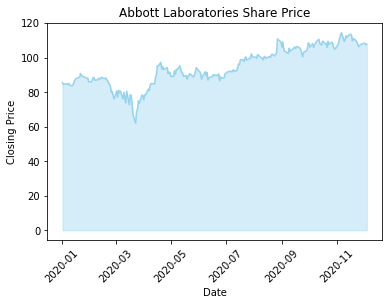

In [ ]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date, df2.Close, color="skyblue", alpha=0.35)
plt.plot(df2.Date, df2.Close, color="skyblue", alpha=0.8)
plt.xticks(rotation=45)
plt.title("Abbott Laboratories Share Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [ ]:
import matplotlib.pyplot as plt

def price_plot(ticker):

    df = pd.DataFrame(data[ticker].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color="skyblue", alpha=0.25)
    plt.plot(df.Date, df.Close, color="skyblue", alpha=0.8)
    plt.xticks(rotation=45)
    plt.title(f"{ticker} Share Price", fontweight="bold")
    plt.xlabel("Date", fontweight="bold")
    plt.ylabel("Closing Price", fontweight="bold")

    return plt.show()

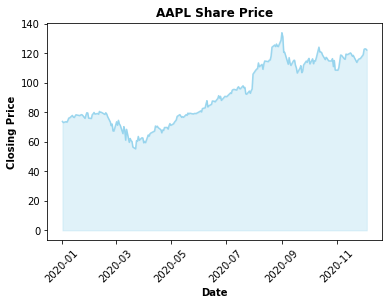

In [ ]:
price_plot('AAPL')

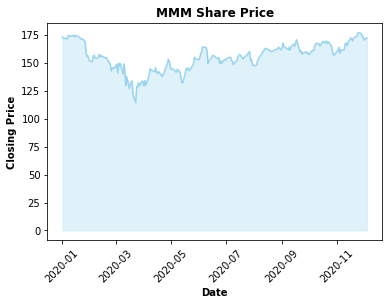

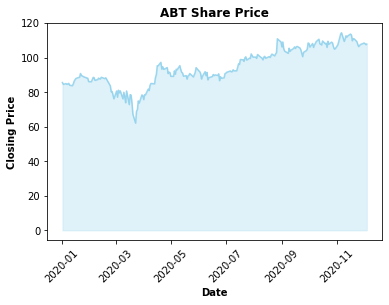

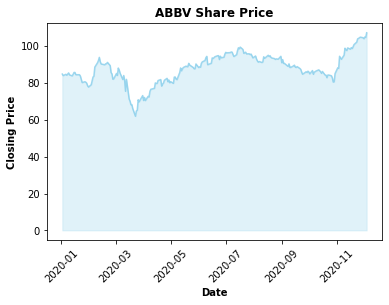

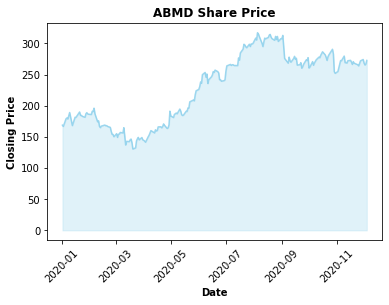

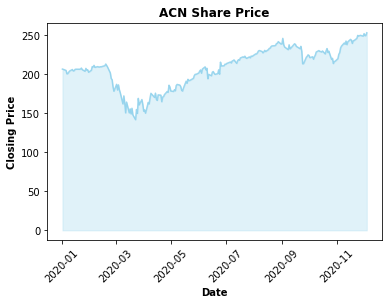

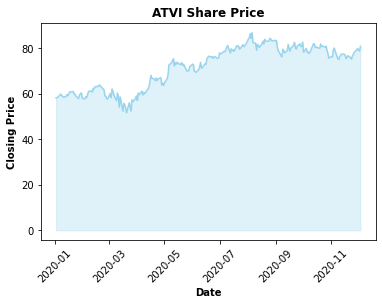

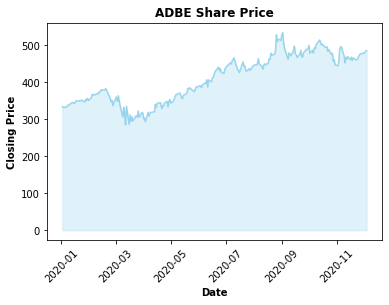

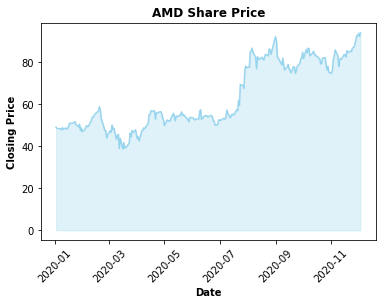

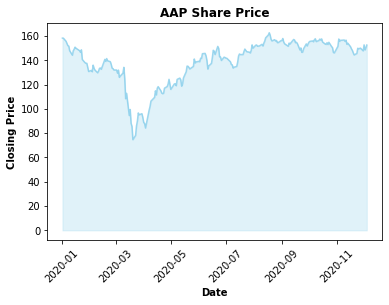

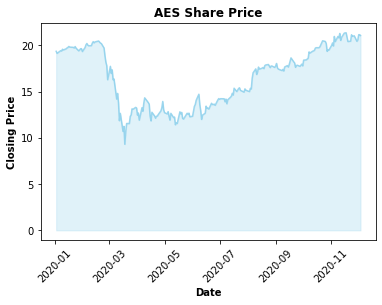

[None, None, None, None, None, None, None, None, None, None]

In [ ]:
[price_plot(i) for i in list(df.Symbol)[:10]]